In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/shopping_behavior_updated.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [20]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [21]:
df = df.rename(columns={
    'Item Purchased': 'Item',
    'Purchase Amount (USD)': 'Price',
    'Review Rating': 'Rating',
    'Subscription Status': 'Subscription',
    'Payment Method': 'Payment',
    'Frequency of Purchases': 'Frequency',
    'Discount Applied': 'Discount',
    'Promo Code Used': 'Promo'
})

In [22]:
df['Color'] = df['Color'].str.strip().str.title()

In [23]:
df['Category'] = df['Category'].str.strip().str.title()

In [24]:
df['Item'] = df['Item'].str.strip().str.title()

In [25]:
df['Location'] = df['Location'].str.strip().str.title()

In [26]:
df['Location'] = df['Location'].str.strip().str.title()

In [27]:
df['Season'] = df['Season'].str.strip().str.title()

In [28]:
df['Frequency'] = df['Frequency'].str.strip().str.title()

In [29]:
total_price = df['Price'].sum()
total_price

np.int64(233081)

In [30]:
color_df = df.groupby('Color')['Price'].sum()

In [31]:
color_df = df.groupby('Color')['Price'].sum()

In [32]:
location_spend = df.groupby('Location')['Price'].sum()

In [33]:
gender_df = df.groupby('Gender')['Price'].sum()

In [34]:
lifetime_purchase = df.groupby('Frequency')['Price'].sum()
print("\nLifetime Purchases is:", lifetime_purchase)


Lifetime Purchases is: Frequency
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: Price, dtype: int64


In [35]:
previous_sales_category = df.groupby('Category')['Previous Purchases'].count()

In [36]:
gender_total = df.groupby('Gender')['Previous Purchases'].count()

In [37]:
avg_order = df['Price'].mean()
print("\nAverage Orders", round(avg_order, 2))


Average Orders 59.76


In [38]:
total_customer = df['Customer ID'].nunique()
print("Total Customers:", total_customer)

Total Customers: 3900


In [39]:
most_popular_payment = df['Payment'].mode()[0]

In [40]:
category_sales = df.groupby('Category')['Price'].sum()
item_sales = df.groupby('Item')['Price'].sum().sort_values(ascending=False).head(10)
season_sales = df.groupby('Season')['Price'].sum()
size_sales = df.groupby('Size')['Price'].sum()
color_sales = df.groupby('Color')['Price'].sum()

In [41]:
# Spending by frequency
frequency_sales = df.groupby('Frequency')['Price'].sum()

# Subscription vs non-subscription
subscription_sales = df.groupby('Subscription')['Price'].sum()

# Average rating per category
rating_by_category = df.groupby('Category')['Rating'].mean()

# Previous purchases effect
repeat_customers = df.groupby('Previous Purchases')['Price'].mean()

In [42]:
discount_effect = df.groupby('Discount')['Price'].mean()
promo_effect = df.groupby('Promo')['Price'].mean()

# Cross-check: total revenue with/without discounts
discount_total = df.groupby('Discount')['Price'].sum()
promo_total = df.groupby('Promo')['Price'].sum()

In [43]:
customer_summary = df.groupby('Customer ID').agg({
    'Price':'sum',
    'Previous Purchases':'sum',
    'Frequency':'first',
    'Subscription':'first'
}).reset_index()

# Create spend-based segments
customer_summary['Segment'] = pd.qcut(customer_summary['Price'], q=3, labels=['Low Value','Mid Value','High Value'])

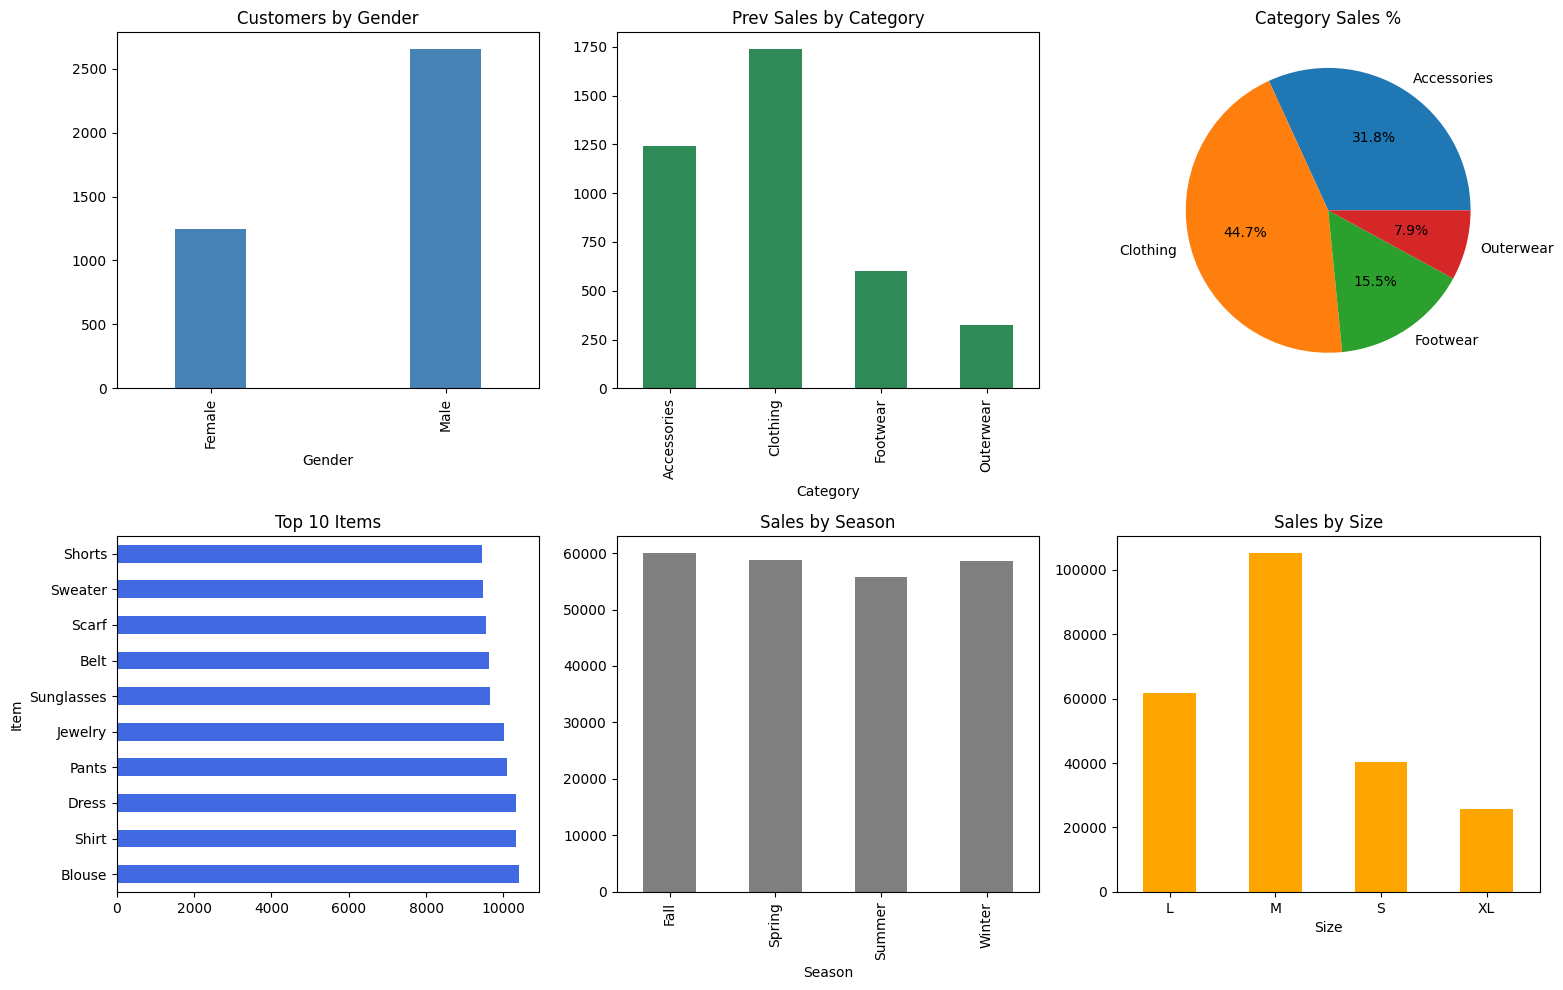

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))

gender_total.plot(kind='bar', ax=axes[0,0], color='steelblue', title='Customers by Gender', width=0.3)
previous_sales_category.plot(kind='bar', ax=axes[0,1], color='seagreen', title='Prev Sales by Category')
category_sales.plot(kind='pie', ax=axes[0,2], autopct='%1.1f%%', ylabel="", title='Category Sales %')
item_sales.plot(kind='barh', ax=axes[1,0], color='royalblue', title='Top 10 Items')
season_sales.plot(kind='bar', ax=axes[1,1], color='grey', title='Sales by Season')
size_sales.plot(kind='bar', ax=axes[1,2], color='orange', title='Sales by Size')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
